### Impor Pustaka dan Pemodelan JST

In [14]:
# impor library
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

#jst
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 15        
Total params: 11,291
Trainable params: 11,291
Non-trainable params: 0
__________________________________________________

### Mengambil Data Training dan Testing

In [15]:
#load data train
data = pd.read_csv('datairistrain.csv', header=None)
dataset=np.asarray(data)
# split into input (X) and output (Y) variables
X = dataset[1:,0:4]
Y = dataset[1:,4:5]

In [16]:
#load data test
data = pd.read_csv('datairistest.csv', header=None)
dataset=np.asarray(data)
# split into input (X) and output (Y) variables
tes = dataset[1:,0:4]
target = dataset[1:,4:5]


### Kompilasi dan Proses Pelatihan

In [17]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [18]:
model_history = model.fit(X, Y, epochs=50,
                    validation_data=(tes, target))

Train on 75 samples, validate on 75 samples
Epoch 1/50
75/75 [==============================] - 0s 3ms/step - loss: 1.0912 - accuracy: 0.4000 - val_loss: 1.0863 - val_accuracy: 0.3600
Epoch 2/50
75/75 [==============================] - 0s 219us/step - loss: 1.1030 - accuracy: 0.3733 - val_loss: 1.0843 - val_accuracy: 0.3467
Epoch 3/50
75/75 [==============================] - 0s 261us/step - loss: 1.0879 - accuracy: 0.3333 - val_loss: 1.0799 - val_accuracy: 0.4800
Epoch 4/50
75/75 [==============================] - 0s 182us/step - loss: 1.0841 - accuracy: 0.2800 - val_loss: 1.0783 - val_accuracy: 0.3467
Epoch 5/50
75/75 [==============================] - 0s 162us/step - loss: 1.0822 - accuracy: 0.3200 - val_loss: 1.0750 - val_accuracy: 0.3467
Epoch 6/50
75/75 [==============================] - 0s 170us/step - loss: 1.0791 - accuracy: 0.3200 - val_loss: 1.0720 - val_accuracy: 0.3467
Epoch 7/50
75/75 [==============================] - 0s 167us/step - loss: 1.0755 - accuracy: 0.3200 - val_

### Membuat Grafik

In [19]:
model_history.history

{'val_loss': [1.0862527402242024,
  1.0843139092127483,
  1.079909513791402,
  1.0783002583185832,
  1.0750290473302206,
  1.072000986735026,
  1.0690942160288492,
  1.0662272961934407,
  1.0635526672999065,
  1.0611035203933716,
  1.0587456019719441,
  1.0562300856908162,
  1.0534899870554606,
  1.0387217871348062,
  1.0246260499954223,
  1.001710603237152,
  0.9875069808959961,
  0.9715246868133545,
  0.9655758905410766,
  0.9479803347587585,
  0.9373533415794373,
  0.9268379433949788,
  0.9161407446861267,
  0.9072805937131246,
  0.899688515663147,
  0.8903398434321086,
  0.8781680552164713,
  0.8666761144002278,
  0.8581567986806233,
  0.8529321376482646,
  0.8477006125450134,
  0.833053453763326,
  0.8204285454750061,
  0.8117300426959991,
  0.8056424252192179,
  0.7947194651762645,
  0.7866477457682292,
  0.7811733738581339,
  0.7711874282360077,
  0.7632033336162567,
  0.7573077841599782,
  0.7503470782438914,
  0.7414279691378276,
  0.7326623678207398,
  0.7291359639167786,
  0

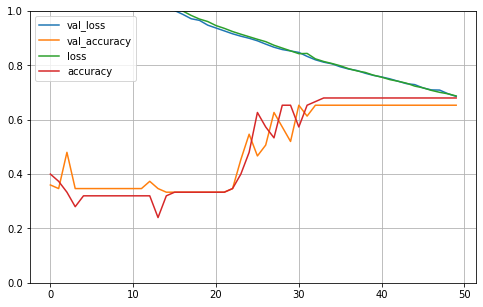

In [20]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [21]:
uji=model.predict(tes[1:2,:])
uji.round(2)


array([[0.57, 0.08, 0.35]], dtype=float32)

In [22]:
model.evaluate(tes,target)

75/75 [==============================] - 0s 50us/step


[0.6857015101114908, 0.653333306312561]

### Save hasil training

In [23]:
from keras.models import model_from_yaml
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
